# Mission To Mars web-scraping homework project
#### Farshad Esnaashari
#### Data Analytics and Visualization - cohort 5

In [1]:
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time

In [2]:
# @NOTE: Replace the path with your actual path to the chromedriver
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)


## Scrape headline news from
### https://nasa.gov/news

In [3]:
# visit the Mission To Mars news url
news_url = 'http://nasa.gov/news'
browser.visit(news_url)
time.sleep(1)

<html class="no-js" dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head>
  <script id="IPengine" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5dd612f7c1cee25c&amp;bkl=0&amp;bl=1&amp;pdt=1631&amp;sid=5dd612f7c1cee25c&amp;pub=ra-54e62f6c4c21221e&amp;rev=v8.28.1-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.nasa.gov&amp;fp=news%2Freleases%2Flatest%2Findex.html&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1574310647625&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__93578574447899760" type="text/javascript">
  </s
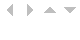

In [4]:
# Get the results into html
html = browser.html
# use BeautifulSoup to print the results
soup = bs(html, 'html.parser')
print(soup.prettify())

In [5]:
# Get the first headline title
news = soup.find(class_="ember-view ubernode")
news_title = news.find('h3').text
news_title

'NASA Announces Ninth Consecutive Clean Financial Audit Opinion'

In [6]:
# Get the dscription for the first headline
news_detail=news.find('p').text
news_detail

'Nov. 19, 2019 - The NASA Office of the Chief Financial Officer (OCFO) has led the way for an unmodified audit opinion on the agency’s fiscal year 2019 (FY 2019) financial statements. This represents NASA’s ninth consecutive "clean" opinion from an independent accounting firm – the highest opinion possible.'

## scrape an image  
### https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars

In [7]:
# Visit the Mars images url
img_url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(img_url)
time.sleep(1)

In [8]:
# Get the html and use BeautifulSoup to print
html=browser.html
soup = bs(html, 'html.parser')
print(soup.prettify())

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="">
 <!-- START HEADER: "DEFAULT" -->
 <!-- Google Tag Manager -->
 <head>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5dd612fb88e3c22f&amp;bkl=0&amp;bl=1&amp;pdt=2312&amp;sid=5dd612fb88e3c22f&amp;pub=&amp;rev=v8.28.1-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&

In [9]:
# Look for the li tag and class slide
slide = soup.find('li', class_="slide")
slide


<li class="slide">
<a class="fancybox" data-description="This image from NASAs Mars Odyssey shows the eastern flank of Alba Mons. Linear faults and graben surround the volcano aligned north/south, intersecting and deflected around the summit." data-fancybox-group="images" data-fancybox-href="/spaceimages/images/largesize/PIA23563_hires.jpg" data-link="/spaceimages/details.php?id=PIA23563" data-thumbnail="/spaceimages/images/wallpaper/PIA23563-640x350.jpg" data-title="Phlegethon Catena">
<div class="image_and_description_container">
<div class="rollover_description">
<h3 class="release_date">November 20, 2019</h3>
<div class="item_tease_overlay">Phlegethon Catena</div>
<div class="overlay_arrow">
<img alt="more arrow" src="/assets/images/overlay-arrow.png"/>
</div>
</div>
<div class="img">
<img alt="Phlegethon Catena" class="thumb" src="/spaceimages/images/wallpaper/PIA23563-640x350.jpg" title="Phlegethon Catena"/>
</div>
<div class="list_text_content">
<div class="article_teaser_body">

In [10]:
# Look for the anchor a in the slide class
link=slide.find('a')
link


<a class="fancybox" data-description="This image from NASAs Mars Odyssey shows the eastern flank of Alba Mons. Linear faults and graben surround the volcano aligned north/south, intersecting and deflected around the summit." data-fancybox-group="images" data-fancybox-href="/spaceimages/images/largesize/PIA23563_hires.jpg" data-link="/spaceimages/details.php?id=PIA23563" data-thumbnail="/spaceimages/images/wallpaper/PIA23563-640x350.jpg" data-title="Phlegethon Catena">
<div class="image_and_description_container">
<div class="rollover_description">
<h3 class="release_date">November 20, 2019</h3>
<div class="item_tease_overlay">Phlegethon Catena</div>
<div class="overlay_arrow">
<img alt="more arrow" src="/assets/images/overlay-arrow.png"/>
</div>
</div>
<div class="img">
<img alt="Phlegethon Catena" class="thumb" src="/spaceimages/images/wallpaper/PIA23563-640x350.jpg" title="Phlegethon Catena"/>
</div>
<div class="list_text_content">
<div class="article_teaser_body">November 20, 2019</

In [11]:
# look for the image link
href=link['data-fancybox-href']
featured_img_url= (f'{img_url}{href}')
featured_img_url


'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars/spaceimages/images/largesize/PIA23563_hires.jpg'

## scrape weather data from 
### https://twitter.com/marswxreport/

In [12]:
# Vist the Mars Twitter website
twitter_url = 'https://twitter.com/marswxreport/'
browser.visit(twitter_url)
time.sleep(1)


In [13]:
# Get the html
html=browser.html
soup=bs(html,'html.parser')
print(soup.prettify())

<html data-scribe-reduced-action-queue="true" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"0068ec9300549498.f06e8e330e11ceff\u003c:00e51d72008ed92c","server_request_start_time":1574310653270,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20191105.1831.7b15bdf","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&&!window.ttftData[t]&&(win

In [14]:
# look for the container with tag div and class js-twee-text-container
container=soup.find('div', class_='js-tweet-text-container')
# look for the paragraph tag p and get the text element
mars_weather=container.find('p').text
mars_weather

'InSight sol 348 (2019-11-19) low -102.5ºC (-152.5ºF) high -23.2ºC (-9.8ºF)\nwinds from the SSE at 5.1 m/s (11.5 mph) gusting to 18.9 m/s (42.3 mph)\npressure at 6.80 hPapic.twitter.com/iZwojPj9au'

## Scrape facts from 
### https://space-facts.com/mars/

In [15]:
# Visit the Mars facts url
facts_url = 'https://space-facts.com/mars/'
browser.visit(facts_url)
time.sleep(1)

In [16]:
# Get the Mars Fact table and convert it to a html string
html = browser.html
tables = pd.read_html(facts_url)
mars_facts_html = tables[0].to_html()
mars_facts_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>\n    <

## Scrape hemisphere images from
### https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars

In [17]:
# Visit the USGS Astrogeology site to obtain high resolution images for each of Mar's hemisphers.
hemispheres_url='https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(hemispheres_url)
time.sleep(2)

In [18]:
# loop through each link and find the image uril and the title
hemisphere_image_urls=[]
url_links = browser.find_by_css('a.product-item h3')

for i in range(len(url_links)):
    
    # create an empty dictionary for each hemisphe
    hemisphere={}
    browser.find_by_css('a.product-item h3')[i].click()
    
    #get hemisphere title
    hemisphere['title'] = browser.find_by_css("h2.title").text
    
    #next find the sample image anchor tag and get href
    sample_elem = browser.find_link_by_text('Sample').first
    hemisphere['img_url'] = sample_elem['href']

   
    #Append hemisphere object to list
    hemisphere_image_urls.append(hemisphere)

    #Finally navigate back to start again on loop
    browser.back()
        
hemisphere_image_urls


[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]

In [19]:
# Create a mars_info dictionary with all the Mars scrape data
mars_info={}
mars_info['news_title'] = news_title
mars_info['news_detail'] = news_detail
mars_info['featured_img_url'] = featured_img_url
mars_info['mars_weather'] = mars_weather
mars_info['mars_facts_html'] = mars_facts_html
mars_info['hemisphere_image_urls'] = hemisphere_image_urls

mars_info

{'news_title': 'NASA Announces Ninth Consecutive Clean Financial Audit Opinion',
 'news_detail': 'Nov. 19, 2019 - The NASA Office of the Chief Financial Officer (OCFO) has led the way for an unmodified audit opinion on the agency’s fiscal year 2019 (FY 2019) financial statements. This represents NASA’s ninth consecutive "clean" opinion from an independent accounting firm – the highest opinion possible.',
 'featured_img_url': 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars/spaceimages/images/largesize/PIA23563_hires.jpg',
 'mars_weather': 'InSight sol 348 (2019-11-19) low -102.5ºC (-152.5ºF) high -23.2ºC (-9.8ºF)\nwinds from the SSE at 5.1 m/s (11.5 mph) gusting to 18.9 m/s (42.3 mph)\npressure at 6.80 hPapic.twitter.com/iZwojPj9au',
 'mars_facts_html': '<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial D